In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_x = mnist.train.images
train_y = mnist.train.labels

print(train_x.shape, train_y.shape)

(55000, 784) (55000,)


In [4]:
total_epochs = 450
batch_size = 100
learning_rate = 0.0001
random_size = 100
image_size = 28*28

init = tf.random_normal_initializer(mean=0.0, stddev=0.01)

In [5]:
def generator(z, reuse=False):
    with tf.variable_scope(name_or_scope='Gen') as scope:
        w0 = tf.get_variable(name='w0', shape=[random_size, 400], initializer=init)
        b0 = tf.get_variable(name='b0', shape=[1, 400], initializer=init)
        z1 = tf.matmul(z, w0) + b0
        a1 = tf.nn.leaky_relu(z1)
        w1 = tf.get_variable(name='w1', shape=[400, image_size], initializer=init)
        b1 = tf.get_variable(name='b1', shape=[1, image_size], initializer=init)
        z2 = tf.matmul(a1, w1) + b1
        a2 = tf.nn.sigmoid(z2)
        return a2

def discriminator(x, reuse=False):
    with tf.variable_scope(name_or_scope='Dis', reuse=reuse) as scope:
        w0 = tf.get_variable(name='w0', shape=[image_size, 100], initializer=init)
        b0 = tf.get_variable(name='b0', shape=[1, 100], initializer=init)
        x1 = tf.matmul(x, w0) + b0
        a1 = tf.nn.leaky_relu(x1)
        w1 = tf.get_variable(name='w1', shape=[100, 1], initializer=init)
        b1 = tf.get_variable(name='b1', shape=[1, 1], initializer=init)
        x2 = tf.matmul(a1, w1) + b1
        a2 = tf.nn.sigmoid(x2)
        return a2

def random_noise(batch_size):
    return np.random.normal(size=[batch_size, random_size])

In [6]:
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32, [None, 784])
    Z = tf.placeholder(tf.float32, [None, random_size])

    graph_gen = generator(Z)
    graph_disc_g = discriminator(graph_gen, False)
    graph_disc_d = discriminator(X, True)

    g_loss = tf.reduce_mean(tf.log(graph_disc_g))
    d_loss = tf.reduce_mean(tf.log(graph_disc_d) + tf.log(tf.ones([1, 1]) - graph_disc_g))

    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if "Gen" in var.name]
    d_vars = [var for var in t_vars if "Dis" in var.name]
    optimizer = tf.train.AdamOptimizer(learning_rate)
    g_train = optimizer.minimize(-g_loss, var_list=g_vars)
    d_train = optimizer.minimize(-d_loss, var_list=d_vars)

In [7]:
print([var.name for var in t_vars])

['Gen/w0:0', 'Gen/b0:0', 'Gen/w1:0', 'Gen/b1:0', 'Dis/w0:0', 'Dis/b0:0', 'Dis/w1:0', 'Dis/b1:0']


======= Epoch:  0  =======
generator:  1.0881976
discriminator:  1.2011642


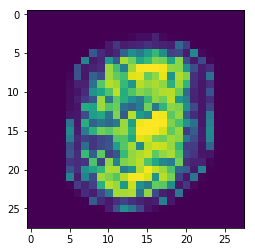

======= Epoch:  2  =======
generator:  0.89298266
discriminator:  1.2057207


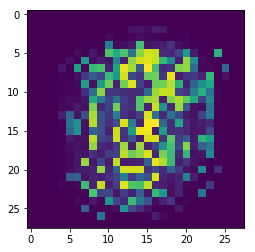

======= Epoch:  4  =======
generator:  0.8675659
discriminator:  1.3102127


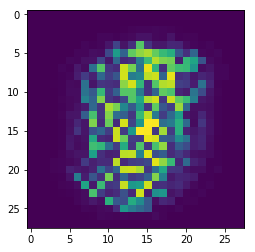

======= Epoch:  6  =======
generator:  1.0294396
discriminator:  1.0975097


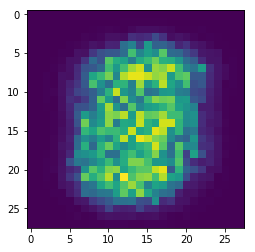

======= Epoch:  8  =======
generator:  0.6426882
discriminator:  1.3744522


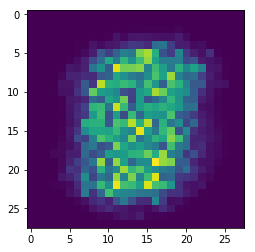

======= Epoch:  10  =======
generator:  0.7113005
discriminator:  1.4348502


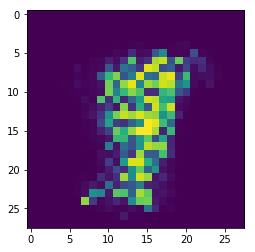

======= Epoch:  12  =======
generator:  1.0416982
discriminator:  1.0766151


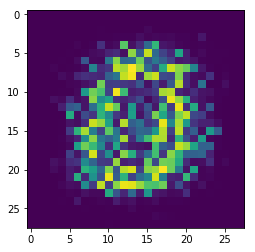

======= Epoch:  14  =======
generator:  0.8365744
discriminator:  1.0519958


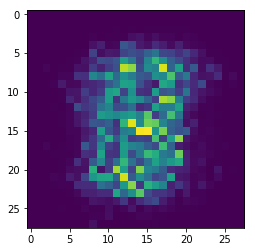

======= Epoch:  16  =======
generator:  0.8289095
discriminator:  1.0767828


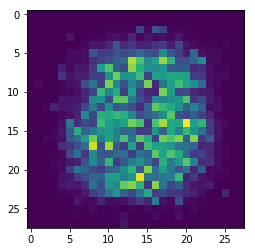

======= Epoch:  18  =======
generator:  1.059612
discriminator:  1.03027


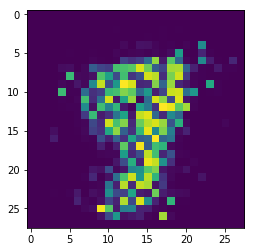

======= Epoch:  20  =======
generator:  1.0880789
discriminator:  0.93324083


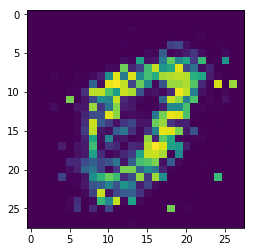

======= Epoch:  22  =======
generator:  1.1366137
discriminator:  0.72372377


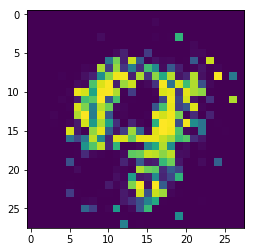

======= Epoch:  24  =======
generator:  1.0277143
discriminator:  0.90307343


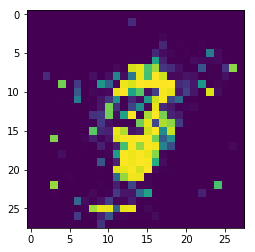

======= Epoch:  26  =======
generator:  1.219505
discriminator:  0.8217067


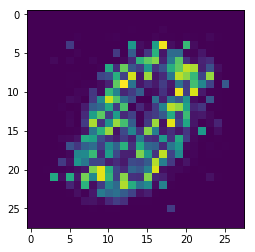

======= Epoch:  28  =======
generator:  0.9732873
discriminator:  1.0927981


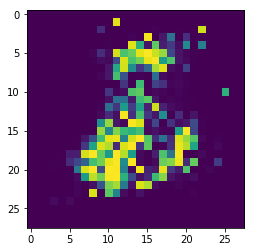

======= Epoch:  30  =======
generator:  1.153495
discriminator:  0.90617216


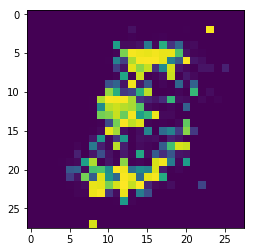

======= Epoch:  32  =======
generator:  1.0981987
discriminator:  0.8042507


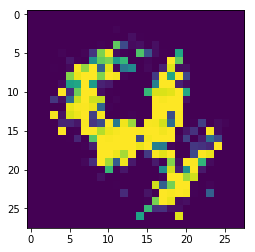

KeyboardInterrupt: 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    total_batches = int(train_x.shape[0] / batch_size)

    for epoch in range(total_epochs):
        for batch in range(total_batches):
            batch_x = train_x[batch * batch_size:(batch + 1) * batch_size]
            batch_y = train_y[batch * batch_size:(batch + 1) * batch_size]
            noise = random_noise(batch_size)

            sess.run(g_train, feed_dict={Z: noise})
            sess.run(d_train, feed_dict={X: batch_x, Z: noise})

            gl, dl = sess.run([g_loss, d_loss], feed_dict={X: batch_x, Z: noise})

        if epoch % 2 == 0:
            print("======= Epoch: ", epoch, " =======")
            print("generator: ", -gl)
            print("discriminator: ", -dl)

        samples = 1
        if epoch % 2 == 0:
            sample_noise = random_noise(samples)
            gen = sess.run(graph_gen, feed_dict={Z: sample_noise})

            for i in range(samples):
                img = gen[i].reshape([28, 28])
                plt.figure()
                plt.imshow(img)
                plt.show()